<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ariadna Desirée Galindo Marín y Miguel de Jesus Aguirre Orozco.

**Fecha:** 14 de octubre del 2020.

**Expediente** : 718272 y 722961.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 9&10

Link Github:
- https://github.com/miguelaguirre11/TareasSimulacion

In [1]:
#Librerías a utilizar
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize
from scipy.stats import beta

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

### Ejercicio 1. 
Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

- Solución Ariadna

La derivada de la función es:
$$\frac{d}{dx}\left(\frac{2}{\pi}\sin^{-1}\sqrt x\right) $$
$$\frac{2}{\pi}\frac{d}{dx}\left(\sin^{-1}\sqrt x\right) $$
recordemos...
$$\frac{d}{dx}\sin^{-1}(x) = \frac{1}{\sqrt {1-x^2}}$$
$$\frac{d}{dx}\sqrt x = \frac{1}{2\sqrt x }$$
Por lo tanto 
$$\frac{d}{dx}\sin^{-1}(\sqrt x) =\left(\frac{2}{\pi}\right)\frac{1}{\sqrt {1-x^2}}  \frac{1}{2\sqrt x}$$
$$\frac{d}{dx}\sin^{-1}(\sqrt x) =\left(\frac{1}{\pi}\right)\frac{1}{\sqrt {1-x^2}}  \frac{1}{\sqrt x}$$
$$ \frac{d}{dx} = \frac{1}{\pi\sqrt {(1-x^2)x}}$$

Para obtener inversa, primero debemos simplificar la función $F(x)$
$$\frac{\pi y}{2}=\sin^{-1}(\sqrt x) $$
$$\sin\left(\frac{\pi y}{2}\right)=\sqrt x $$
$$\left(\sin\left(\frac{\pi y}{2}\right)=\sqrt x\right)^2 $$
$$\sin^2\left(\frac{\pi y}{2}\right)= x $$
Por lo tanto
$$\sin^2\left(\frac{\pi x}{2}\right)= y $$


In [2]:
def comparar_aleatorios_densidad(f, Finv, N):
    u=np.random.uniform(0.01,1,N)
    f_rand=Finv(u)
    x=np.arange(0.01,1,.01)
    f_densidad=f(x)
    plt.hist(f_rand,density=True, bins=45)
    plt.plot(x,f_densidad)
    plt.show()

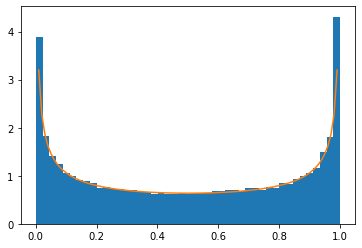

In [3]:
f=lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
Finv=lambda u: (np.sin(u*np.pi/2))**2
N=100000
comparar_aleatorios_densidad(f,Finv,N)

- Solución Miguel

La derivada de la función es:
$$\frac{d}{dx}\left(\frac{2}{\pi}\sin^{-1}\sqrt x\right) $$
$$\frac{2}{\pi}\frac{d}{dx}\left(\sin^{-1}\sqrt x\right) $$
recordemos...
$$\frac{d}{dx}\sin^{-1}(x) = \frac{1}{\sqrt {1-x^2}}$$
$$\frac{d}{dx}\sqrt x = \frac{1}{2\sqrt x }$$
Por lo tanto 
$$\frac{d}{dx}\sin^{-1}(\sqrt x) =\left(\frac{2}{\pi}\right)\frac{1}{\sqrt {1-x^2}}  \frac{1}{2\sqrt x}$$
$$\frac{d}{dx}\sin^{-1}(\sqrt x) =\left(\frac{1}{\pi}\right)\frac{1}{\sqrt {1-x^2}}  \frac{1}{\sqrt x}$$
$$ \frac{d}{dx} = \frac{1}{\pi\sqrt {(1-x^2)x}}$$

Para obtener inversa, primero debemos simplificar la función $F(x)$
$$\frac{\pi y}{2}=\sin^{-1}(\sqrt x) $$
$$\sin\left(\frac{\pi y}{2}\right)=\sqrt x $$
$$\left(\sin\left(\frac{\pi y}{2}\right)=\sqrt x\right)^2 $$
$$\sin^2\left(\frac{\pi y}{2}\right)= x $$
Por lo tanto
$$\sin^2\left(\frac{\pi x}{2}\right)= y $$


In [33]:
def comparar_aleatorios_densidad(f, Finv, N):
    u = np.random.uniform(0.1, 0.9, N)
    f_rand = Finv(u)
    x = np.arange(0.01, 0.99, 0.001)
    f_densidad = f(x)
    plt.hist(f_rand, density = True, bins = 40)
    plt.plot(x, f_densidad)
    plt.show()

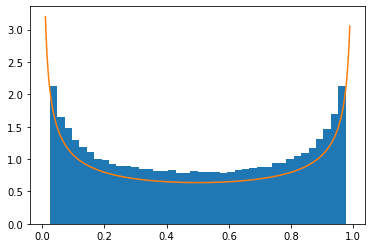

In [34]:
f = lambda x: 1 / ((np.sqrt(1 - x)) * np.sqrt(x) * np.pi)
Finv = lambda u: (np.sin(u * np.pi / 2))**2
N = 100000
comparar_aleatorios_densidad(f, Finv, N)

### Ejercicio 2. 
Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

- Solución Ariadna

In [4]:
#funcion historgrama
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

In [5]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

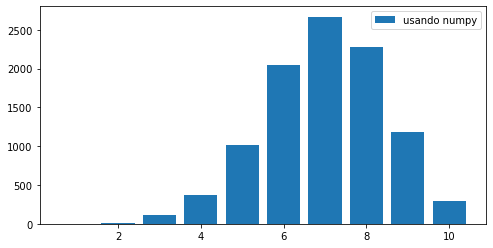

In [6]:
n = 10; p = 0.7; N = 10**4
p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

- Solución Miguel

In [7]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    
    plt.legend()
    plt.show()

In [8]:
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

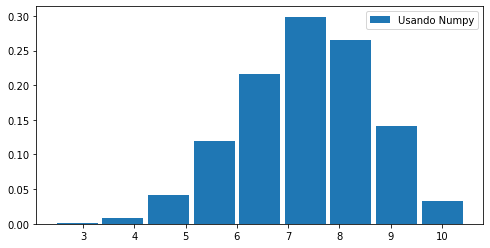

In [9]:
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'Usando Numpy')

### Ejercicio 3

Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

- Solución Ariadna

$$p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,2,\cdots,n$$
$$P_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)} =$$
$$ \frac{n!}{(i+1)!(i)!} \frac{n-i}{(n-i)!} {p^{i}p(1-p)^{n-i}}(1-p)^{-1} =$$
$$p_i=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$
$$p_{i+1}=\frac{n-i}{(1+i)}P \frac {p_i}{1-p}$$

Las ventajas de que usemos una función recursiva es que son menos complejas y se traduce a menos tiempo que tarda la máquina en procesarla, por lo tanto cuando hay más iteraciones se tarda mucho menos. Es más facíl utilizarla porque tiene menos variables que despejar y nos brinda soluciones "más elegantes".

- Solución Miguel

$$\frac{p_{i+1}}{p_i} = n!p^ip(1-p)^ni!(n-i)!(1-p)^i/(1-p)^i(1-p)(i+1)!(n-i+1)!n!p^i(1-p)^n$$
 
> Despejando: 

$$\frac{p_{i+1}}{p_i} =(n-i)p / (i+1)(1-p)$$ 

> Es igual a: 

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

### Ejercicio 4
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

- Solución Ariadna

- Solución Miguel

In [10]:
def P_acum_poisson(n,l):
    Pr = np.zeros(n)
    Pr[0] = np.exp(-1)
    def pr(k):
        nonlocal Pr
        Pr[k + 1] = (l / (n + 1)) * Pr[k]
        
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

### Parte 2

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

- Solución Ariadna

- Solución Miguel

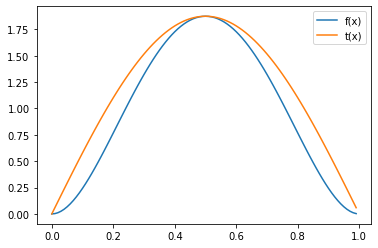

In [11]:
f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) 
t = lambda x: max_f*np.sin(np.pi*x)
x = np.arange(0,1,.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

- Solución Ariadna

- Solución Miguel

$$g(x)= \frac{t(x)}{c}$$

$$c=\int_{-\infty}^{\infty} t(x)dx$$

$$c=\int_{0}^{1}a \sin(\pi x)dx$$

$$g(x)=\frac{a \sin(\pi x)}{\frac{2a}{\pi}}$$

$$g(x)=\frac{ \sin(\pi x)}{\frac{2}{\pi}}$$

$$g(x)=\frac{ \pi\sin(\pi x)}{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

- Solución Ariadna

- Solución Miguel

$$G(x)=\int_{0}^{x}\frac{ \pi\sin(\pi x)}{2} =\frac{-\cos(\pi x)}{2} + \frac{1}{2}$$

Tomamos U como variable: 

$$ U =\frac{-\cos(\pi x)}{2} + \frac{1}{2}$$

$$ 2U - 1 =-\cos(\pi x)$$

$$ -2U + 1 =\cos(\pi x)$$

$$\arccos(-2U +1) = \pi x$$

$$x = \frac{\arccos(-2U+1)}{\pi}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

- Solución Ariadna

- Solución Miguel

In [13]:
def comparar_aleatorios_densidad2(f, finv, N):
    U = np.random.uniform(0, 1, N)
    frand = finv(U)
    x = np.arange(0, 1, 0.001)
    fdensidad = f(x)
    plt.hist(frand, density = True, bins = 40)
    plt.plot(x, fdensidad)
    plt.show()

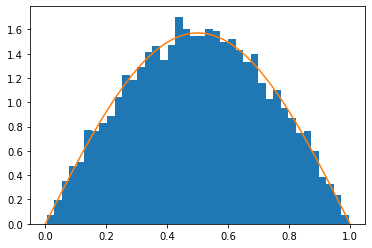

In [14]:
g = lambda x: (np.pi / 2) * np.sin(np.pi * x)
G_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u+1)
N = 10000

comparar_aleatorios_densidad2(g, G_inv, N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
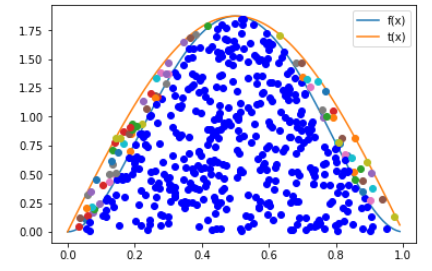

- Solución Ariadna

- Solución Miguel

In [15]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()

El máximo de f es: [1.875]


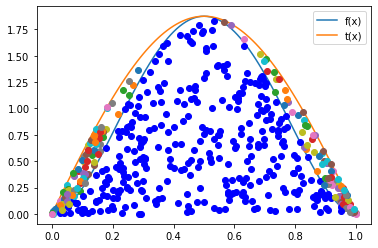

In [16]:
f = lambda x:30*(x**2-2*x**3+x**4)

max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t = lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

aleatorias = Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

- Solución Ariadna

- Solución Miguel

In [37]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    
    c = np.zeros(len(R1))
    condition = R2*t_x <= f_x
    
    def senoidal(i):
        nonlocal c
        c[i] = 1 if condition[i] else 0
        
    [senoidal(i) for i in range(len(R1))]
    
    return c.sum()

In [38]:
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)

max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

ts = lambda x: max_f*np.sin(np.pi*x)
tc = lambda x: max_f*np.ones(len(x))
x = np.arange(0,1,0.01)

# Validación del método
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('Porcentaje con función constante:  ', Acep_rechazo2(R2,R1,f,tc) * 100 / len(R1),'%')
print('Porcentaje con función senoidal: ', Acep_rechazo2(R2,R1,f,ts) * 100 / len(R2),'%')

Porcentaje con función constante:   55.8 %
Porcentaje con función senoidal:  69.8 %


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

- Solución Ariadna

- Solución Miguel

El máximo de f es: [2.109375]


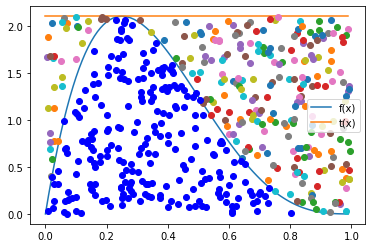

In [18]:
f = lambda x: 20 * x * (1 - x)**3

max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

aleatorias = Acep_rechazo(R2,R1,f,t)